In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('UV_noise.csv', header= None)  #读取数据
df

,0,1
0,200.0,0.128823
1,200.2,0.117582
2,200.4,0.125130
3,200.6,0.121738
4,200.8,0.104534
...,...,...
1096,419.2,0.022818
1097,419.4,0.025858
1098,419.6,0.029388
1099,419.8,0.021187


In [5]:
df.columns = ['wl','abs']

In [6]:
df

,wl,abs
0,200.0,0.128823
1,200.2,0.117582
2,200.4,0.125130
3,200.6,0.121738
4,200.8,0.104534
...,...,...
1096,419.2,0.022818
1097,419.4,0.025858
1098,419.6,0.029388
1099,419.8,0.021187


In [7]:
type(df)

pandas.core.frame.DataFrame

In [7]:
import numpy as np
wl = np.array(df['wl'])
Abs = np.array(df['abs'])

In [8]:
import matplotlib.pyplot as plt

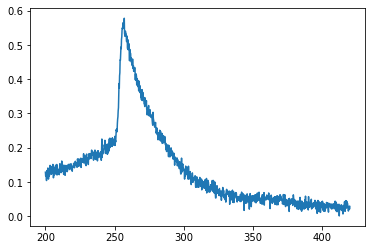

In [9]:
plt.plot(wl, Abs)
plt.show()

In [10]:
Abs_smooth = np.convolve(Abs, np.ones(9)/9, mode = 'same') #9 个点做平均

In [11]:
 np.ones(9)/9

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [12]:
len(Abs_smooth)

1101

In [13]:
with open('UV_filter.csv', mode = 'a', encoding = 'UTF-8') as f:
    for i in range(len(wl)):
        f.write(str(wl[i]) + ',' + str(Abs[i]) + ',' + str(Abs_smooth[i]) + '\n')

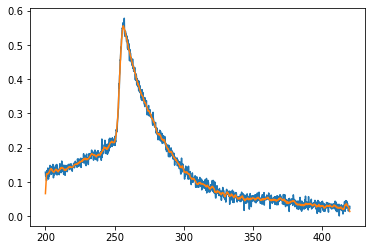

In [14]:
plt.plot(wl,Abs)
plt.plot(wl,Abs_smooth)
plt.show()

In [17]:
from scipy.signal import savgol_filter #信号平滑

In [18]:
Abs_sg = savgol_filter(Abs, 9 ,2)

In [19]:
Abs_sg

array([0.12651419, 0.1231361 , 0.12071748, ..., 0.0233465 , 0.02576063,
       0.02941872])

In [20]:
len(Abs_sg)

1101

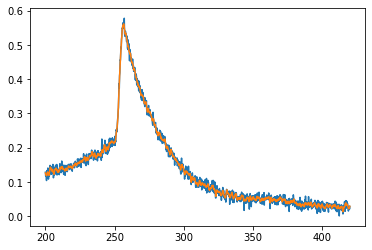

In [21]:
plt.plot(wl,Abs)
plt.plot(wl,Abs_sg)
plt.show()

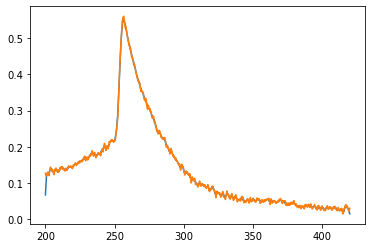

In [22]:
plt.plot(wl,Abs_smooth)
plt.plot(wl,Abs_sg)
plt.show()

In [23]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [24]:
help(savgol_filter)

Help on function savgol_filter in module scipy.signal._savitzky_golay:

savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
    Apply a Savitzky-Golay filter to an array.
    
    This is a 1-D filter. If `x`  has dimension greater than 1, `axis`
    determines the axis along which the filter is applied.
    
    Parameters
    ----------
    x : array_like
        The data to be filtered. If `x` is not a single or double precision
        floating point array, it will be converted to type ``numpy.float64``
        before filtering.
    window_length : int
        The length of the filter window (i.e., the number of coefficients).
        `window_length` must be a positive odd integer. If `mode` is 'interp',
        `window_length` must be less than or equal to the size of `x`.
    polyorder : int
        The order of the polynomial used to fit the samples.
        `polyorder` must be less than `window_length`.
    deriv : int, optional
    

In [29]:
def findpeak(wl,a):  #找峰值
    peak = []
    for i in range(len(a)):
        if i < 100:
            if a[i] == np.max(a[:i + 100]): 
                peak.append(wl[i])
        elif i > len(a) - 100:
            if a[i] == np.max(a[i - 100:]):
                peak.append(wl[i])
        else:
            if a[i] == np.max(a[i - 100: i + 100]):
                peak.append(wl[i])
    return peak

In [30]:
findpeak(wl,Abs_sg)

[256.6, 417.2]